In [1]:
from utils.config import Config
from model.rpn import RegionProposalNetwork
import tensorflow as tf
from utils.data import Dataset
from utils.anchor import AnchorTargetCreator
from model.fasterrcnn import _fast_rcnn_loc_loss
from utils.visualize import vis_train

physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from utils.data import VOC_BBOX_LABEL_NAMES

In [3]:
config = Config()
config._parse({})
dataset = Dataset(config)

======user config========
{'max_size': 1000,
 'min_size': 600,
 'voc_data_dir': 'D:/DataClinic/simple-faster-rcnn-pytorch/VOCdevkit/VOC2007/'}
==========end============


In [8]:
img, bbox, label = dataset[1]
x = tf.convert_to_tensor(img, dtype=tf.float32)
x = tf.expand_dims(x, axis=0)

In [5]:
rpn = RegionProposalNetwork()
anchor_target_creator = AnchorTargetCreator()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [6]:
feature_map, rpn_loc, rpn_score, roi, roi_score, anchor = rpn(test_x)

In [7]:
rpn.load_weights('rpn.h5')

In [11]:
for epoch in range(1500):
    for i in range(1):
        img, bbox, label = dataset[1]
        x = tf.convert_to_tensor(img, dtype=tf.float32)
        x = tf.expand_dims(x, axis=0)
        with tf.GradientTape() as tape:
            feature_map, rpn_loc, rpn_score, roi, roi_score, anchor = rpn(x)

            gt_rpn_loc, gt_rpn_label = anchor_target_creator(bbox, anchor)
            rpn_loc_loss = _fast_rcnn_loc_loss(rpn_loc, gt_rpn_loc, gt_rpn_label)

            idx_ = gt_rpn_label != -1
            rpn_cls_loss = tf.keras.losses.SparseCategoricalCrossentropy()(gt_rpn_label[idx_], rpn_score[0][idx_])

            total_loss = rpn_cls_loss + rpn_loc_loss
        grads = tape.gradient(total_loss, rpn.trainable_variables)
        optimizer.apply_gradients(zip(grads, rpn.trainable_variables))

        if i % 20 == 0:
            print("step", i)
            print("rpn_loc_loss = ", round(float(rpn_loc_loss), 4),
                  "rpn_cls_loss = ", round(float(rpn_cls_loss), 4))

        # if i % 1000 == 0:
            rpn.save_weights('rpn.h5')

    if epoch % 50 == 0:
        feature_map, rpn_loc, rpn_score, roi, roi_score, anchor = rpn(test_x)
        vis_train(test_img, test_bbox, test_label, roi, roi_score, epoch)

step 0
rpn_loc_loss =  0.0056 rpn_cls_loss =  0.6932
step 0
rpn_loc_loss =  0.0055 rpn_cls_loss =  0.6921
step 0
rpn_loc_loss =  0.0055 rpn_cls_loss =  0.6908
step 0
rpn_loc_loss =  0.0055 rpn_cls_loss =  0.6894
step 0
rpn_loc_loss =  0.0054 rpn_cls_loss =  0.6884
step 0
rpn_loc_loss =  0.0054 rpn_cls_loss =  0.687
step 0
rpn_loc_loss =  0.0054 rpn_cls_loss =  0.6859
step 0
rpn_loc_loss =  0.0053 rpn_cls_loss =  0.6851
step 0
rpn_loc_loss =  0.0053 rpn_cls_loss =  0.6852
step 0
rpn_loc_loss =  0.0053 rpn_cls_loss =  0.6838
step 0
rpn_loc_loss =  0.0052 rpn_cls_loss =  0.6819
step 0
rpn_loc_loss =  0.0052 rpn_cls_loss =  0.6818
step 0
rpn_loc_loss =  0.0052 rpn_cls_loss =  0.6805
step 0
rpn_loc_loss =  0.0051 rpn_cls_loss =  0.6797
step 0
rpn_loc_loss =  0.0051 rpn_cls_loss =  0.6787
step 0
rpn_loc_loss =  0.0051 rpn_cls_loss =  0.6766
step 0
rpn_loc_loss =  0.0051 rpn_cls_loss =  0.6771
step 0
rpn_loc_loss =  0.005 rpn_cls_loss =  0.6758
step 0
rpn_loc_loss =  0.005 rpn_cls_loss =  0.6

step 0
rpn_loc_loss =  0.0426 rpn_cls_loss =  0.1229
step 0
rpn_loc_loss =  0.1598 rpn_cls_loss =  0.1231
step 0
rpn_loc_loss =  0.3002 rpn_cls_loss =  0.1438
step 0
rpn_loc_loss =  0.0429 rpn_cls_loss =  0.1513
step 0
rpn_loc_loss =  0.0049 rpn_cls_loss =  0.1635
step 0
rpn_loc_loss =  0.0012 rpn_cls_loss =  0.1548
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.1549
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.1508
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.1281
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.1125
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.1074
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.1352
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.123
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.1614
step 0
rpn_loc_loss =  0.0011 rpn_cls_loss =  0.1326
step 0
rpn_loc_loss =  0.0015 rpn_cls_loss =  0.139
step 0
rpn_loc_loss =  0.0021 rpn_cls_loss =  0.1331
step 0
rpn_loc_loss =  0.0038 rpn_cls_loss =  0.1405
step 0
rpn_loc_loss =  0.0085 rpn_cls_loss =  0.

step 0
rpn_loc_loss =  0.079 rpn_cls_loss =  0.089
step 0
rpn_loc_loss =  0.1897 rpn_cls_loss =  0.1541
step 0
rpn_loc_loss =  0.139 rpn_cls_loss =  0.1333
step 0
rpn_loc_loss =  0.0052 rpn_cls_loss =  0.1279
step 0
rpn_loc_loss =  0.0011 rpn_cls_loss =  0.0983
step 0
rpn_loc_loss =  0.001 rpn_cls_loss =  0.1049
step 0
rpn_loc_loss =  0.001 rpn_cls_loss =  0.1388
step 0
rpn_loc_loss =  0.001 rpn_cls_loss =  0.1199
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.1305
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.1212
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.1118
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.1268
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.0735
step 0
rpn_loc_loss =  0.0011 rpn_cls_loss =  0.1118
step 0
rpn_loc_loss =  0.0011 rpn_cls_loss =  0.0813
step 0
rpn_loc_loss =  0.0012 rpn_cls_loss =  0.0828
step 0
rpn_loc_loss =  0.0014 rpn_cls_loss =  0.0815
step 0
rpn_loc_loss =  0.0018 rpn_cls_loss =  0.114
step 0
rpn_loc_loss =  0.0031 rpn_cls_loss =  0.1
ste

step 0
rpn_loc_loss =  0.0815 rpn_cls_loss =  0.0862
step 0
rpn_loc_loss =  0.1827 rpn_cls_loss =  0.0907
step 0
rpn_loc_loss =  0.0832 rpn_cls_loss =  0.0973
step 0
rpn_loc_loss =  0.0098 rpn_cls_loss =  0.087
step 0
rpn_loc_loss =  0.0011 rpn_cls_loss =  0.0915
step 0
rpn_loc_loss =  0.001 rpn_cls_loss =  0.0978
step 0
rpn_loc_loss =  0.001 rpn_cls_loss =  0.0988
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.1255
step 0
rpn_loc_loss =  0.001 rpn_cls_loss =  0.0882
step 0
rpn_loc_loss =  0.001 rpn_cls_loss =  0.1
step 0
rpn_loc_loss =  0.0011 rpn_cls_loss =  0.0887
step 0
rpn_loc_loss =  0.0012 rpn_cls_loss =  0.0939
step 0
rpn_loc_loss =  0.0018 rpn_cls_loss =  0.0911
step 0
rpn_loc_loss =  0.0029 rpn_cls_loss =  0.0721
step 0
rpn_loc_loss =  0.0059 rpn_cls_loss =  0.0942
step 0
rpn_loc_loss =  0.0157 rpn_cls_loss =  0.0736
step 0
rpn_loc_loss =  0.0507 rpn_cls_loss =  0.0694
step 0
rpn_loc_loss =  0.1449 rpn_cls_loss =  0.0951
step 0
rpn_loc_loss =  0.1648 rpn_cls_loss =  0.0964
s

step 0
rpn_loc_loss =  0.0982 rpn_cls_loss =  0.0731
step 0
rpn_loc_loss =  0.0127 rpn_cls_loss =  0.0775
step 0
rpn_loc_loss =  0.0011 rpn_cls_loss =  0.0892
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.0815
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.0525
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.0466
step 0
rpn_loc_loss =  0.0008 rpn_cls_loss =  0.0623
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.045
step 0
rpn_loc_loss =  0.0009 rpn_cls_loss =  0.0516
step 0
rpn_loc_loss =  0.0012 rpn_cls_loss =  0.0563
step 0
rpn_loc_loss =  0.0016 rpn_cls_loss =  0.0553
step 0
rpn_loc_loss =  0.0027 rpn_cls_loss =  0.0466
step 0
rpn_loc_loss =  0.0061 rpn_cls_loss =  0.0598
step 0
rpn_loc_loss =  0.0151 rpn_cls_loss =  0.0564
step 0
rpn_loc_loss =  0.0354 rpn_cls_loss =  0.0516
step 0
rpn_loc_loss =  0.0664 rpn_cls_loss =  0.0394
step 0
rpn_loc_loss =  0.0734 rpn_cls_loss =  0.0459
step 0
rpn_loc_loss =  0.0399 rpn_cls_loss =  0.0699
step 0
rpn_loc_loss =  0.0074 rpn_cls_loss =  0

step 0
rpn_loc_loss =  0.0007 rpn_cls_loss =  0.0082
step 0
rpn_loc_loss =  0.0007 rpn_cls_loss =  0.0096
step 0
rpn_loc_loss =  0.0007 rpn_cls_loss =  0.0089
step 0
rpn_loc_loss =  0.0006 rpn_cls_loss =  0.0058
step 0
rpn_loc_loss =  0.0006 rpn_cls_loss =  0.0056
step 0
rpn_loc_loss =  0.0007 rpn_cls_loss =  0.0046
step 0
rpn_loc_loss =  0.0008 rpn_cls_loss =  0.0053
step 0
rpn_loc_loss =  0.0011 rpn_cls_loss =  0.0044
step 0
rpn_loc_loss =  0.0018 rpn_cls_loss =  0.0054
step 0
rpn_loc_loss =  0.0035 rpn_cls_loss =  0.0078
step 0
rpn_loc_loss =  0.0082 rpn_cls_loss =  0.0056
step 0
rpn_loc_loss =  0.0199 rpn_cls_loss =  0.0085
step 0
rpn_loc_loss =  0.0403 rpn_cls_loss =  0.0085
step 0
rpn_loc_loss =  0.0734 rpn_cls_loss =  0.0107
step 0
rpn_loc_loss =  0.0636 rpn_cls_loss =  0.011
step 0
rpn_loc_loss =  0.0195 rpn_cls_loss =  0.0257
step 0
rpn_loc_loss =  0.0024 rpn_cls_loss =  0.0099
step 0
rpn_loc_loss =  0.0008 rpn_cls_loss =  0.011
step 0
rpn_loc_loss =  0.0007 rpn_cls_loss =  0.

step 0
rpn_loc_loss =  0.0052 rpn_cls_loss =  0.0025
step 0
rpn_loc_loss =  0.0074 rpn_cls_loss =  0.0028
step 0
rpn_loc_loss =  0.0098 rpn_cls_loss =  0.0031
step 0
rpn_loc_loss =  0.0121 rpn_cls_loss =  0.0084
step 0
rpn_loc_loss =  0.0155 rpn_cls_loss =  0.0163
step 0
rpn_loc_loss =  0.0212 rpn_cls_loss =  0.0135
step 0
rpn_loc_loss =  0.02 rpn_cls_loss =  0.0274
step 0
rpn_loc_loss =  0.0135 rpn_cls_loss =  0.0052
step 0
rpn_loc_loss =  0.0063 rpn_cls_loss =  0.0037
step 0
rpn_loc_loss =  0.0024 rpn_cls_loss =  0.0063
step 0
rpn_loc_loss =  0.0011 rpn_cls_loss =  0.0062
step 0
rpn_loc_loss =  0.0008 rpn_cls_loss =  0.0042
step 0
rpn_loc_loss =  0.0006 rpn_cls_loss =  0.0072
step 0
rpn_loc_loss =  0.0008 rpn_cls_loss =  0.0058
step 0
rpn_loc_loss =  0.0007 rpn_cls_loss =  0.0035
step 0
rpn_loc_loss =  0.0006 rpn_cls_loss =  0.0031
step 0
rpn_loc_loss =  0.0005 rpn_cls_loss =  0.0043
step 0
rpn_loc_loss =  0.0005 rpn_cls_loss =  0.0049
step 0
rpn_loc_loss =  0.0005 rpn_cls_loss =  0.

step 0
rpn_loc_loss =  0.0027 rpn_cls_loss =  0.0015
step 0
rpn_loc_loss =  0.0026 rpn_cls_loss =  0.0022
step 0
rpn_loc_loss =  0.0027 rpn_cls_loss =  0.0019
step 0
rpn_loc_loss =  0.0026 rpn_cls_loss =  0.0018
step 0
rpn_loc_loss =  0.0027 rpn_cls_loss =  0.0022
step 0
rpn_loc_loss =  0.0026 rpn_cls_loss =  0.0021
step 0
rpn_loc_loss =  0.0026 rpn_cls_loss =  0.0024
step 0
rpn_loc_loss =  0.0027 rpn_cls_loss =  0.0015
step 0
rpn_loc_loss =  0.0028 rpn_cls_loss =  0.0014
step 0
rpn_loc_loss =  0.0027 rpn_cls_loss =  0.0016
step 0
rpn_loc_loss =  0.0026 rpn_cls_loss =  0.0042
step 0
rpn_loc_loss =  0.0031 rpn_cls_loss =  0.0026
step 0
rpn_loc_loss =  0.004 rpn_cls_loss =  0.0016
step 0
rpn_loc_loss =  0.0039 rpn_cls_loss =  0.0028
step 0
rpn_loc_loss =  0.0037 rpn_cls_loss =  0.0023
step 0
rpn_loc_loss =  0.0034 rpn_cls_loss =  0.0012
step 0
rpn_loc_loss =  0.0031 rpn_cls_loss =  0.002
step 0
rpn_loc_loss =  0.0027 rpn_cls_loss =  0.0008
step 0
rpn_loc_loss =  0.0025 rpn_cls_loss =  0.

step 0
rpn_loc_loss =  0.0002 rpn_cls_loss =  0.0015
step 0
rpn_loc_loss =  0.0002 rpn_cls_loss =  0.0009
step 0
rpn_loc_loss =  0.0002 rpn_cls_loss =  0.0016
step 0
rpn_loc_loss =  0.0002 rpn_cls_loss =  0.0019
step 0
rpn_loc_loss =  0.0003 rpn_cls_loss =  0.0011
step 0
rpn_loc_loss =  0.0003 rpn_cls_loss =  0.0015
step 0
rpn_loc_loss =  0.0003 rpn_cls_loss =  0.0022
step 0
rpn_loc_loss =  0.0004 rpn_cls_loss =  0.0013
step 0
rpn_loc_loss =  0.0005 rpn_cls_loss =  0.0014
step 0
rpn_loc_loss =  0.0007 rpn_cls_loss =  0.0015
step 0
rpn_loc_loss =  0.0011 rpn_cls_loss =  0.0014
step 0
rpn_loc_loss =  0.0016 rpn_cls_loss =  0.0007
step 0
rpn_loc_loss =  0.0023 rpn_cls_loss =  0.0013
step 0
rpn_loc_loss =  0.0033 rpn_cls_loss =  0.0011
step 0
rpn_loc_loss =  0.0045 rpn_cls_loss =  0.004
step 0
rpn_loc_loss =  0.0065 rpn_cls_loss =  0.0029
step 0
rpn_loc_loss =  0.0101 rpn_cls_loss =  0.0006
step 0
rpn_loc_loss =  0.0138 rpn_cls_loss =  0.0011
step 0
rpn_loc_loss =  0.0125 rpn_cls_loss =  0

step 0
rpn_loc_loss =  0.0014 rpn_cls_loss =  0.0009
step 0
rpn_loc_loss =  0.0015 rpn_cls_loss =  0.0013
step 0
rpn_loc_loss =  0.0017 rpn_cls_loss =  0.0016
step 0
rpn_loc_loss =  0.0018 rpn_cls_loss =  0.0013
step 0
rpn_loc_loss =  0.0021 rpn_cls_loss =  0.0009
step 0
rpn_loc_loss =  0.0022 rpn_cls_loss =  0.0009
step 0
rpn_loc_loss =  0.0023 rpn_cls_loss =  0.0007
step 0
rpn_loc_loss =  0.0023 rpn_cls_loss =  0.0008
step 0
rpn_loc_loss =  0.0024 rpn_cls_loss =  0.0006
step 0
rpn_loc_loss =  0.0022 rpn_cls_loss =  0.001
step 0
rpn_loc_loss =  0.0022 rpn_cls_loss =  0.0008
step 0
rpn_loc_loss =  0.002 rpn_cls_loss =  0.0009
step 0
rpn_loc_loss =  0.0019 rpn_cls_loss =  0.0008
step 0
rpn_loc_loss =  0.0017 rpn_cls_loss =  0.0011
step 0
rpn_loc_loss =  0.0015 rpn_cls_loss =  0.0008
step 0
rpn_loc_loss =  0.0014 rpn_cls_loss =  0.001
step 0
rpn_loc_loss =  0.0012 rpn_cls_loss =  0.001
step 0
rpn_loc_loss =  0.0011 rpn_cls_loss =  0.0007
step 0
rpn_loc_loss =  0.001 rpn_cls_loss =  0.000

In [9]:
feature_map, rpn_loc, rpn_score, roi, roi_score, anchor = rpn(x)

In [10]:
for x in (feature_map, rpn_loc, rpn_score, roi, roi_score, anchor):
    print('shape:', x.shape, 'max:', tf.reduce_max(x).numpy(), 'min:', tf.reduce_min(x).numpy())

shape: (1, 38, 57, 512) max: 8.359511 min: 0.0
shape: (1, 38, 57, 36) max: 4.274824 min: -4.196747
shape: (1, 19494, 2) max: 1.0 min: 1.6206038e-09
shape: (2000, 4) max: 900.0 min: 0.0
shape: (2000,) max: 0.999845 min: 0.10606085
shape: (19494, 4) max: 1266.0387 min: -354.03867


In [11]:
from utils.anchor import AnchorTargetCreator
anchor_target_creator = AnchorTargetCreator(n_sample=256, pos_iou_thresh=0.7, neg_iou_thresh=0.3, pos_ratio=0.5)
gt_rpn_loc, gt_rpn_label = anchor_target_creator(bbox, anchor)

In [12]:
for x in (gt_rpn_loc, gt_rpn_label):
    print('shape:', x.shape, 'max:', tf.reduce_max(x).numpy(), 'min:', tf.reduce_min(x).numpy())

shape: (19494, 4) max: 6.265629 min: -3.6338673
shape: (19494,) max: 1 min: -1


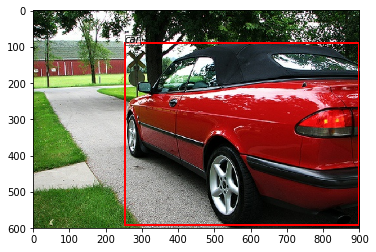

In [13]:
from utils.data import vis
vis(img, bbox, label)

In [14]:
img = (img + 1) / 2.

In [15]:
from utils.anchor import loc2bbox
rpn_bbox = loc2bbox(anchor, rpn_loc)

In [17]:
import matplotlib.pyplot as plt

In [18]:
%matplotlib notebook

<IPython.core.display.Javascript object>


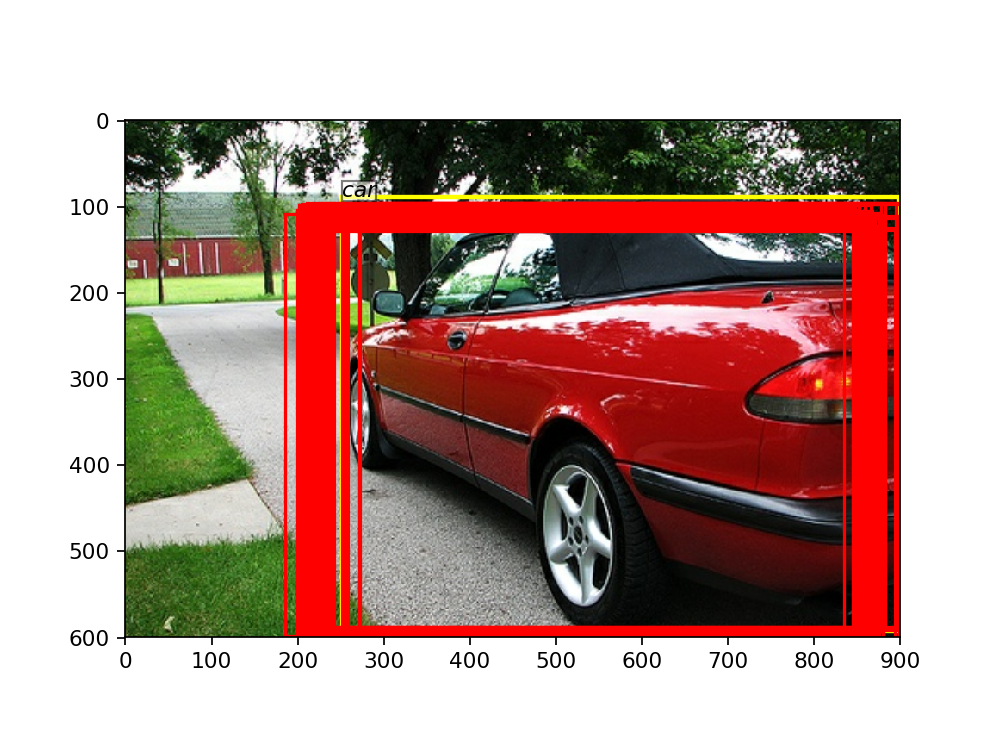

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img)

for i in range(len(bbox)):
    y1 = bbox[i][0]
    x1 = bbox[i][1]
    y2 = bbox[i][2]
    x2 = bbox[i][3]
    height = y2 - y1
    width = x2 - x1
    ax.add_patch(plt.Rectangle((x1,y1), width, height, fill=False, edgecolor='yellow', linewidth=2))
    ax.text(x1,y1,VOC_BBOX_LABEL_NAMES[label[i]],style='italic',bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 0})

pos_rpn_bbox = rpn_bbox[gt_rpn_label == 1]
for i in range(len(pos_rpn_bbox)):
    y1 = pos_rpn_bbox[i][0]
    x1 = pos_rpn_bbox[i][1]
    y2 = pos_rpn_bbox[i][2]
    x2 = pos_rpn_bbox[i][3]
    height = y2 - y1
    width = x2 - x1
    ax.add_patch(plt.Rectangle((x1,y1), width, height, fill=False, edgecolor='red', linewidth=1.5))